## *Plan*
1. Merging the data
2. Clean data and seperate the data by patch
2. Visual parts of the data to find connections between values
3. Create a model to classifiy our findings


In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, plot_roc_curve

Now we import the data and look at the first elements

In [2]:
data = pd.read_csv(r'data/high_diamond_ranked_10min.csv')
data.head()


gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         16567          6.8               17047   
1                   1         17620          6.8               17438   
2                   0         17285          6.8               17254   
3                   0         16478          7.0               17961   
4                   0         17404          7.0               18313   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                  8         19.7         1656.7  
1               1173         24.0         1762.0  
2               1033         20.3         1728.5  
3                  7         23.5         1647.8  
4               -230         22.5         1740.4  

[5 rows x 40 columns]

Summary of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Checking if there are any missing values

In [4]:
data.isna().values[data.isna().values==True]

array([], dtype=bool)

As we can see there are no missing values, we will now look at our data and try to see if it has values that are not relevent.

### Visualization
We will now visualize the all the correlations between the columns

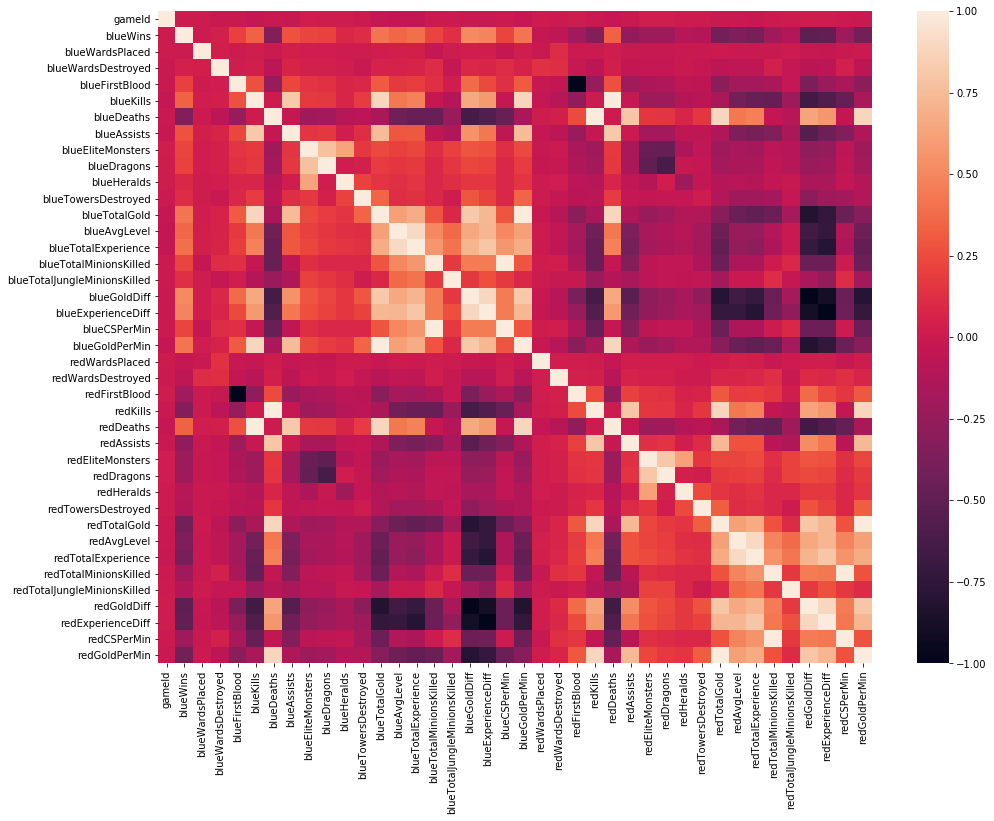

In [5]:
#Creating a correlation map
matrix = data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(matrix)
plt.show()

We want to see what variables have an affect on whever blue wins or not

In [6]:
blueWinsCorr = matrix["blueWins"]
blueWinsCorr = blueWinsCorr.reindex(blueWinsCorr.abs().sort_values().index)[::-1]
blueWinsCorr

blueWins                        1.000000
redGoldDiff                    -0.511119
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
redExperienceDiff              -0.489558
blueGoldPerMin                  0.417213
blueTotalGold                   0.417213
redGoldPerMin                  -0.411396
redTotalGold                   -0.411396
blueTotalExperience             0.396141
redTotalExperience             -0.387588
blueAvgLevel                    0.357820
redAvgLevel                    -0.352127
blueDeaths                     -0.339297
redKills                       -0.339297
redDeaths                       0.337358
blueKills                       0.337358
blueAssists                     0.276685
redAssists                     -0.271047
blueTotalMinionsKilled          0.224909
blueCSPerMin                    0.224909
blueEliteMonsters               0.221944
redEliteMonsters               -0.221551
blueDragons                     0.213768
redCSPerMin     

### Usefull features:
1. blueGoldDiff
2. blueExperienceDiff
3. blueGoldPerMin
4. redGoldPerMin
5. blueTotalExperience
6. redTotalExperience
7. blueAvgLevel
8. redAvgLevel
9. blueDeaths
10. blueKills
11. blueAssists
12. redAssists
13. blueCSPerMin
14. blueEliteMonsters
15. redEliteMonsters
16. blueDragons
17. redCSPerMin
18. redDragons
19. blueFirstBlood
20. blueTotalJungleMinionsKilled
21. blueTowersDestroyed
22. redTotalJungleMinionsKilled
23. redTowersDestroyed
24. redHeralds
25. blueHeralds
26. redWardsDestroyed
27. blueWardsDestroyed
28. redWardsPlaced
29. blueWardsPlaced

### Unnecessary features and reasons

redGoldDiff = -blueGoldDiff

redExperienceDiff = -blueExperienceDiff 

blueTotalGold = blueGoldPerMin

redTotalGold = redGoldPerMin

redKills = blueDeaths

redDeaths = blueKills

blueTotalMinionsKilled = blueCSPerMin

redTotalMinionsKilled = redCSPerMin

redFirstBlood = -blueFirstBlood

gameId - not a stat in the game 

In [7]:
df = data.drop(columns=["redGoldDiff","redExperienceDiff","blueTotalGold","redTotalGold","redDeaths","redKills","blueTotalMinionsKilled","redTotalMinionsKilled","redFirstBlood","gameId"])
df

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0            0               28                   2               1   
1            0               12                   1               0   
2            0               15                   0               0   
3            0               43                   1               0   
4            0               75                   4               0   
...        ...              ...                 ...             ...   
9874         1               17                   2               1   
9875         1               54                   0               0   
9876         0               23                   1               0   
9877         0               14                   4               1   
9878         1               18                   0               1   

      blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0             9           6           11                  0            0   
1             5           5            5                  0            0   
2             7          11            4                  1            1   
3             4           5            5                  1            0   
4             6           6            6                  0            0   
...         ...         ...          ...                ...          ...   
9874          7           4            5                  1            1   
9875          6           4            8                  1            1   
9876          6           7            5                  0            0   
9877          2           3            3                  1            1   
9878          6           6            5                  0            0   

      blueHeralds  ...  redAssists  redEliteMonsters  redDragons  redHeralds  \
0               0  ...           8                 0           0           0   
1               0  ...           2                 2           1           1   
2               0  ...          14                 0           0           0   
3               1  ...          10                 0           0           0   
4               0  ...           7                 1           1           0   
...           ...  ...         ...               ...         ...         ...   
9874            0  ...           7                 0           0           0   
9875            0  ...           3                 0           0           0   
9876            0  ...          11                 1           1           0   
9877            0  ...           1                 0           0           0   
9878            0  ...           4                 1           1           0   

      redTowersDestroyed  redAvgLevel  redTotalExperience  \
0                      0          6.8               17047   
1                      1          6.8               17438   
2                      0          6.8               17254   
3                      0          7.0               17961   
4                      0          7.0               18313   
...                  ...          ...                 ...   
9874                   0          6.8               16498   
9875                   0          7.0               18367   
9876                   0          7.4               19909   
9877                   0          7.2               18314   
9878                   0          6.8               17379   

      redTotalJungleMinionsKilled  redCSPerMin  redGoldPerMin  
0                              55         19.7         1656.7  
1                              52         24.0         1762.0  
2                              28         20.3         1728.5  
3                              47         23.5         1647.8  
4                              67         22.5         1740.4  
...                           ...          ...            ...  
9874                           34         22.9         1524.6  
9875                           56 

We wil now change the binary value of blueWins to the winner, so that will be either red side for 0 and blue side for 1

In [8]:
df['blueWins'] = df['blueWins'].map({0: "Red", 1: "Blue"})
df.rename(columns={'blueWins': "Winner"},inplace=True)

In [9]:
allModels=[None, None, None, None]
df

Winner  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0       Red               28                   2               1          9   
1       Red               12                   1               0          5   
2       Red               15                   0               0          7   
3       Red               43                   1               0          4   
4       Red               75                   4               0          6   
...     ...              ...                 ...             ...        ...   
9874   Blue               17                   2               1          7   
9875   Blue               54                   0               0          6   
9876    Red               23                   1               0          6   
9877    Red               14                   4               1          2   
9878   Blue               18                   0               1          6   

      blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0              6           11                  0            0            0   
1              5            5                  0            0            0   
2             11            4                  1            1            0   
3              5            5                  1            0            1   
4              6            6                  0            0            0   
...          ...          ...                ...          ...          ...   
9874           4            5                  1            1            0   
9875           4            8                  1            1            0   
9876           7            5                  0            0            0   
9877           3            3                  1            1            0   
9878           6            5                  0            0            0   

      ...  redAssists  redEliteMonsters  redDragons  redHeralds  \
0     ...           8                 0           0           0   
1     ...           2                 2           1           1   
2     ...          14                 0           0           0   
3     ...          10                 0           0           0   
4     ...           7                 1           1           0   
...   ...         ...               ...         ...         ...   
9874  ...           7                 0           0           0   
9875  ...           3                 0           0           0   
9876  ...          11                 1           1           0   
9877  ...           1                 0           0           0   
9878  ...           4                 1           1           0   

      redTowersDestroyed  redAvgLevel  redTotalExperience  \
0                      0          6.8               17047   
1                      1          6.8               17438   
2                      0          6.8               17254   
3                      0          7.0               17961   
4                      0          7.0               18313   
...                  ...          ...                 ...   
9874                   0          6.8               16498   
9875                   0          7.0               18367   
9876                   0          7.4               19909   
9877                   0          7.2               18314   
9878                   0          6.8               17379   

      redTotalJungleMinionsKilled  redCSPerMin  redGoldPerMin  
0                              55         19.7         1656.7  
1                              52         24.0         1762.0  
2                              28         20.3         1728.5  
3                              47         23.5         1647.8  
4                              67         22.5         1740.4  
...                           ...          ...            ...  
9874                           34         22.9         1524.6  
9875                           56         20.6         1545.6  
9876 

## Helper functions
Functions that we will use later to display the results

In [10]:
def showAccuracy(expect,prediction):
    print("Accuracy score:",accuracy_score(expect, prediction))
    print("Report:\n",classification_report(expect,prediction))
    return accuracy_score(expect, prediction)

In [11]:
def showRocCurve(testData,expect,prediction,classifier,curves=[]):
    print("Roc curve:")
    #random guess, should be about 50/50 in getting the correct prediction for each element
    randomGuess = [np.random.randint(0,1) for i in range(len(expect))]
    #get the false positive rate and true positive rate
    falsePosRate, truePosRate, _ = roc_curve(expect.map({"Red": 0, "Blue": 1}),randomGuess)
    
    #plot roc curve of our classifier 
    rCurve = plot_roc_curve(estimator=classifier,X=testData,y=expect)
    print(type(rCurve))
    #plot roc curve of the random guesses
    plt.plot(falsePosRate, truePosRate, linestyle='--', color='blue')
    for i in curves:
        if type(i)==type(rCurve):
            i.plot(ax=rCurve.ax_)
    plt.show()
    return rCurve

In [12]:
def showConfusionMatrix(expect,prediction,name=''):
    #size
    plt.figure(figsize=(8,6))
    conMatrix = confusion_matrix(expect,prediction)
    #name of groups
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    #amout in each group
    group_counts = [value for value in conMatrix.flatten()]
    #percentage
    group_percentages = [str('{0:.2f}'.format(value*100))+"%" for value in conMatrix.flatten()/np.sum(conMatrix)]
    #put the values together
    labels = [str(name)+"\n"+str(amount)+"\n"+str(percent) for name,amount,percent in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    #show confusion matrix
    plot = sns.heatmap(conMatrix,annot=labels,fmt="",cmap='Reds',xticklabels=["Red","Blue"],yticklabels=["Red","Blue"])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plot.set_title(str(name)+"\nConfusion matrix:")
    if name != '':
        plt.savefig("assets/"+name+".png",dpi=750)
    return "assets/"+name+".png"


In [13]:
seed = 1431237624


## KNN
Now that we have our data we can proceed to make a model that predicts if blue team will win

In [14]:
data = df.drop(columns="Winner")
exp = df["Winner"]

trainD, testD, trainE, testE = train_test_split(data, exp)
cross_validator = KFold(5)


### K=5
We will use a KNN model with k=5 as a baseline model and try to make a better one

In [15]:
knn =  KNeighborsClassifier(n_neighbors=5)
knn.fit(trainD,trainE)
pred = knn.predict(testD)
baseLineModel={'prediction':pred,'confusion matrix':None,'accuracy':0,'roc curve':None}

In [16]:
baseLineModel['accuracy'] = showAccuracy(testE,pred)

Accuracy score: 0.68582995951417
Report:
               precision    recall  f1-score   support

        Blue       0.69      0.67      0.68      1229
         Red       0.68      0.70      0.69      1241

    accuracy                           0.69      2470
   macro avg       0.69      0.69      0.69      2470
weighted avg       0.69      0.69      0.69      2470



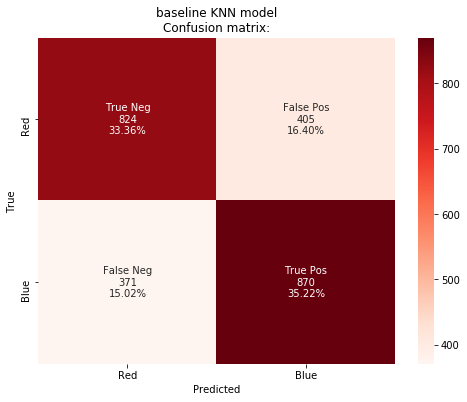

In [17]:
baseLineModel['confusion matrix'] = showConfusionMatrix(testE,pred,name="baseline KNN model")

Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


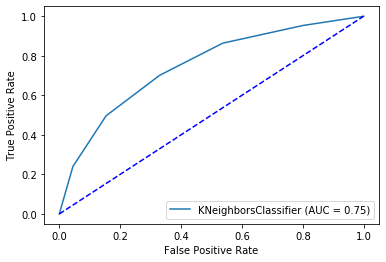

In [18]:
baseLineModel['roc curve'] = showRocCurve(testD,testE,pred,knn)

### Finding the most optimal hyperparameters for our model
Our goal is to find a model that is better than our baseline model

In [19]:
#paramaters that may effect the classifications
#we dont need to check the linear kernel since it takes a large amount of time and the linear function is unstable for this dataset
param_grid=[
    {'n_neighbors':[i for i in range(1,31)],'weights':['uniform','distance']}
]
#change n_jobs for faster/slower performance
gridSearch = GridSearchCV(knn,param_grid,cv=5,scoring='accuracy',return_train_score=True,verbose=4,n_jobs=2)

In [20]:
gridSearch.fit(trainD,trainE)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    3.9s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:   15.0s
[Parallel(n_jobs=2)]: Done 217 tasks      | elapsed:   36.3s
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed:   51.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=2,
             param_grid=[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=4)

In [21]:
knn_clf = gridSearch.best_estimator_
knn_clf.fit(trainD,trainE)
knn_pred = knn_clf.predict(testD)
knnModel = {'prediction':knn_pred,'confusion matrix':None,'accuracy':0,'roc curve':None}
knn_clf

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform')

In [22]:
knnModel['accuracy'] = showAccuracy(testE,knn_pred)

Accuracy score: 0.7234817813765182
Report:
               precision    recall  f1-score   support

        Blue       0.72      0.73      0.72      1229
         Red       0.73      0.72      0.72      1241

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



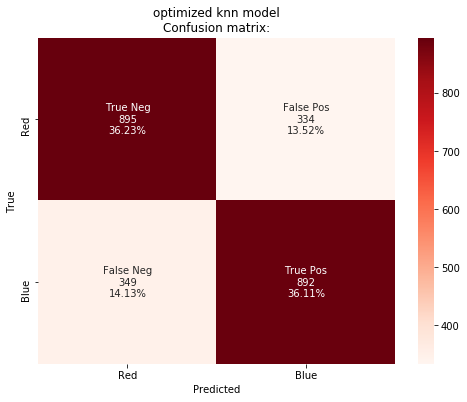

In [23]:
knnModel['confusion matrix'] = showConfusionMatrix(testE,knn_pred,name='optimized knn model')

Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


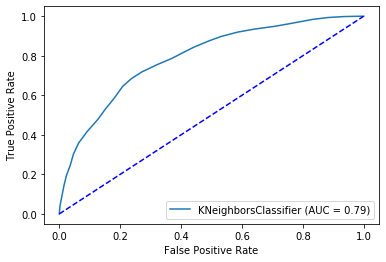

In [24]:
knnModel['roc curve'] = showRocCurve(testD,testE,knn_pred,knn_clf)

### Comparing the results

In [25]:
print("baseline model accuracy:",baseLineModel["accuracy"],"\noptimized knn model accuracy:",knnModel["accuracy"])

baseline model accuracy: 0.68582995951417 
optimized knn model accuracy: 0.7234817813765182


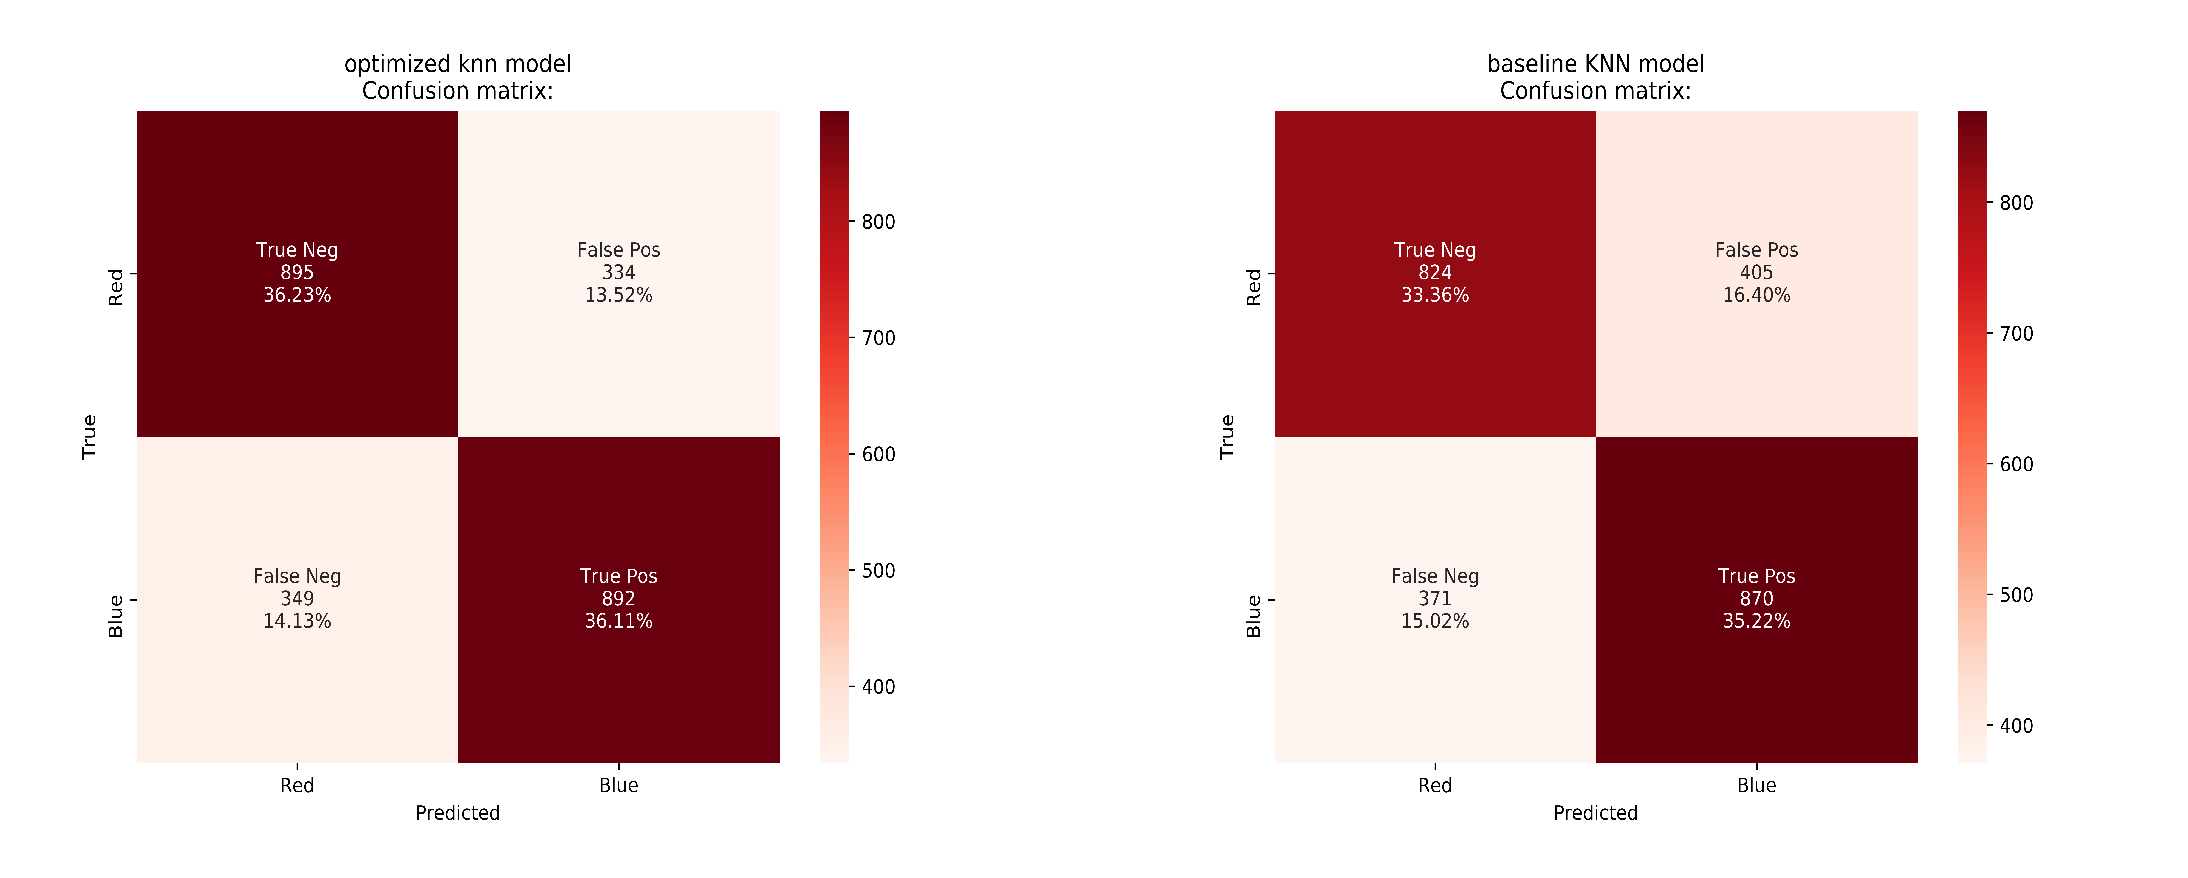

In [26]:
plt.figure(figsize=(32,12))
plt.subplot(121)
plt.imshow(plt.imread(knnModel['confusion matrix']),interpolation='none',
                   
                   extent=[-2, 4, -3, 2], clip_on=True)
plt.axis('off')
plt.subplot(122)
plt.imshow(plt.imread(baseLineModel['confusion matrix']),interpolation='none',
                   
                   extent=[-2, 4, -3, 2], clip_on=True)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()



Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


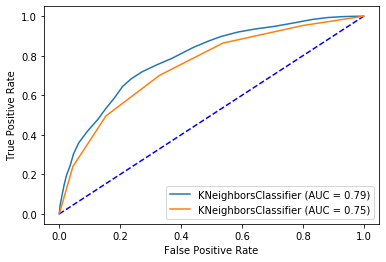

In [27]:
showRocCurve(testD,testE,knn_pred,knn_clf,curves=[baseLineModel["roc curve"]])

As we can see, Knn might not be the best classifier for our task, so instead Let's try using a Support Vector Classifier instead.

In [28]:
allModels[0] = baseLineModel
allModels[1] = knnModel

## Support Vector Machines

Support Vector Machines are effective when using high dimentions like our dataset

In [29]:
from sklearn.svm import SVC,NuSVC,LinearSVC

### Finding optimal SVM classifier

In [30]:
svcClf = SVC().fit(trainD,trainE)
nuClf = NuSVC().fit(trainD,trainE)
linearClf = LinearSVC().fit(trainD,trainE)

pred1 = svcClf.predict(testD)
pred2 = nuClf.predict(testD)
pred3 = linearClf.predict(testD)

In [31]:
acc1 = showAccuracy(testE,pred1)
acc2 = showAccuracy(testE,pred2)
acc3 = showAccuracy(testE,pred3)

Accuracy score: 0.7251012145748987
Report:
               precision    recall  f1-score   support

        Blue       0.73      0.71      0.72      1229
         Red       0.72      0.74      0.73      1241

    accuracy                           0.73      2470
   macro avg       0.73      0.73      0.73      2470
weighted avg       0.73      0.73      0.73      2470

Accuracy score: 0.4647773279352227
Report:
               precision    recall  f1-score   support

        Blue       0.45      0.35      0.40      1229
         Red       0.47      0.58      0.52      1241

    accuracy                           0.46      2470
   macro avg       0.46      0.46      0.46      2470
weighted avg       0.46      0.46      0.46      2470

Accuracy score: 0.5947368421052631
Report:
               precision    recall  f1-score   support

        Blue       0.89      0.21      0.34      1229
         Red       0.56      0.97      0.71      1241

    accuracy                           0.59      2

From our test, we cam see that the SVC classifier is best classifier to use so we will proceed to use it

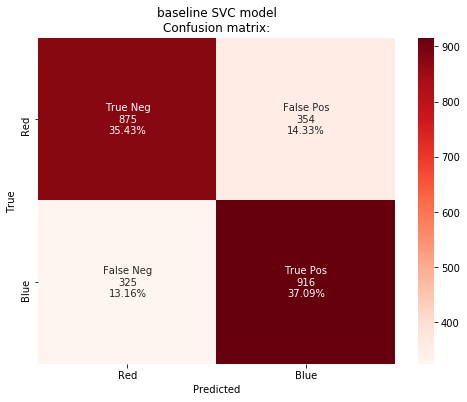

In [63]:

cm = showConfusionMatrix(testE,pred1,name="baseline SVC model")

Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


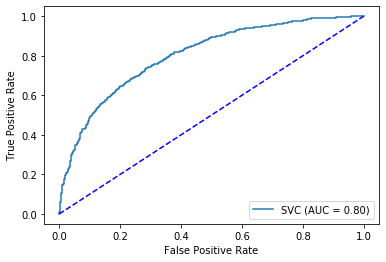

In [64]:
svcRoc = showRocCurve(testD,testE,pred1,svcClf)

In [65]:
baseLineModel_SVM={'prediction':pred1,'confusion matrix':cm,'accuracy':acc1,'roc curve':svcRoc}

### Finding the most optimal hyperparameters for our model

Now that we have chosen our SVM classifier and made a baseline model, we can now look for the optimal settings for our data so that our new model will be better.

In [35]:
#paramaters that may effect the classifications
#we dont check the linear kernel since it takes a large amount of time and the a function is unstable for this dataset
param_grid=[
    {'C':[0.75,0.9,1,1.1,1.25],'kernel':['rbf']},
    #{'C':[0.25,1,4,12,25,50,100],'kernel':['poly'],'degree':[1,3],"coef0":[1,5,7]}
    #{'kernel':['poly'],'degree':[1,3],"coef0":[1,5,7]}
]
#change n_jobs for faster/slower performance'
cross_validator.n_splits=10
gridSearch = GridSearchCV(svcClf,param_grid,cv=10,scoring='accuracy',verbose=4,return_train_score=True,n_jobs=-1)

In [36]:
gridSearch.fit(trainD,trainE)

Fitting 10 folds for each of 11 candidates, totalling 110 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:  1.9min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.75, 0.9, 1, 1.1, 1.25], 'kernel': ['rbf']},
                         {'coef0': [1, 5, 7], 'degree': [1, 3],
                          'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='accuracy', verbose=4)

### Displaying results
Let's see how good this model preformed

In [37]:
model = gridSearch.best_estimator_
model.fit(trainD,trainE)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=5,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
pred = model.predict(testD)
acc = showAccuracy(testE,pred)

Accuracy score: 0.7222672064777328
Report:
               precision    recall  f1-score   support

        Blue       0.73      0.70      0.72      1229
         Red       0.72      0.74      0.73      1241

    accuracy                           0.72      2470
   macro avg       0.72      0.72      0.72      2470
weighted avg       0.72      0.72      0.72      2470



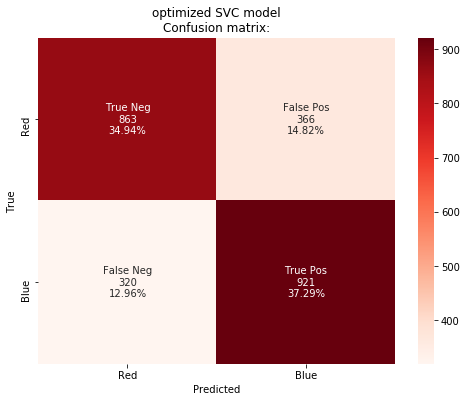

In [67]:
cm = showConfusionMatrix(testE,pred,name="optimized SVC model")

Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


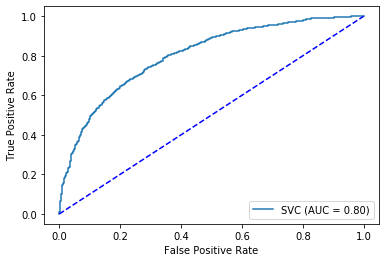

In [55]:
modelRoc = showRocCurve(testD,testE,pred,model)

In [68]:
SVC_model={'prediction':pred1,'confusion matrix':cm,'accuracy':acc,'roc curve':modelRoc}

### Comparing the results

In [42]:
print("baseline model accuracy:",baseLineModel_SVM["accuracy"],"\noptimized SVC model accuracy:",SVC_model["accuracy"])

baseline model accuracy: 0.7251012145748987 
optimized SVC model accuracy: 0.7222672064777328


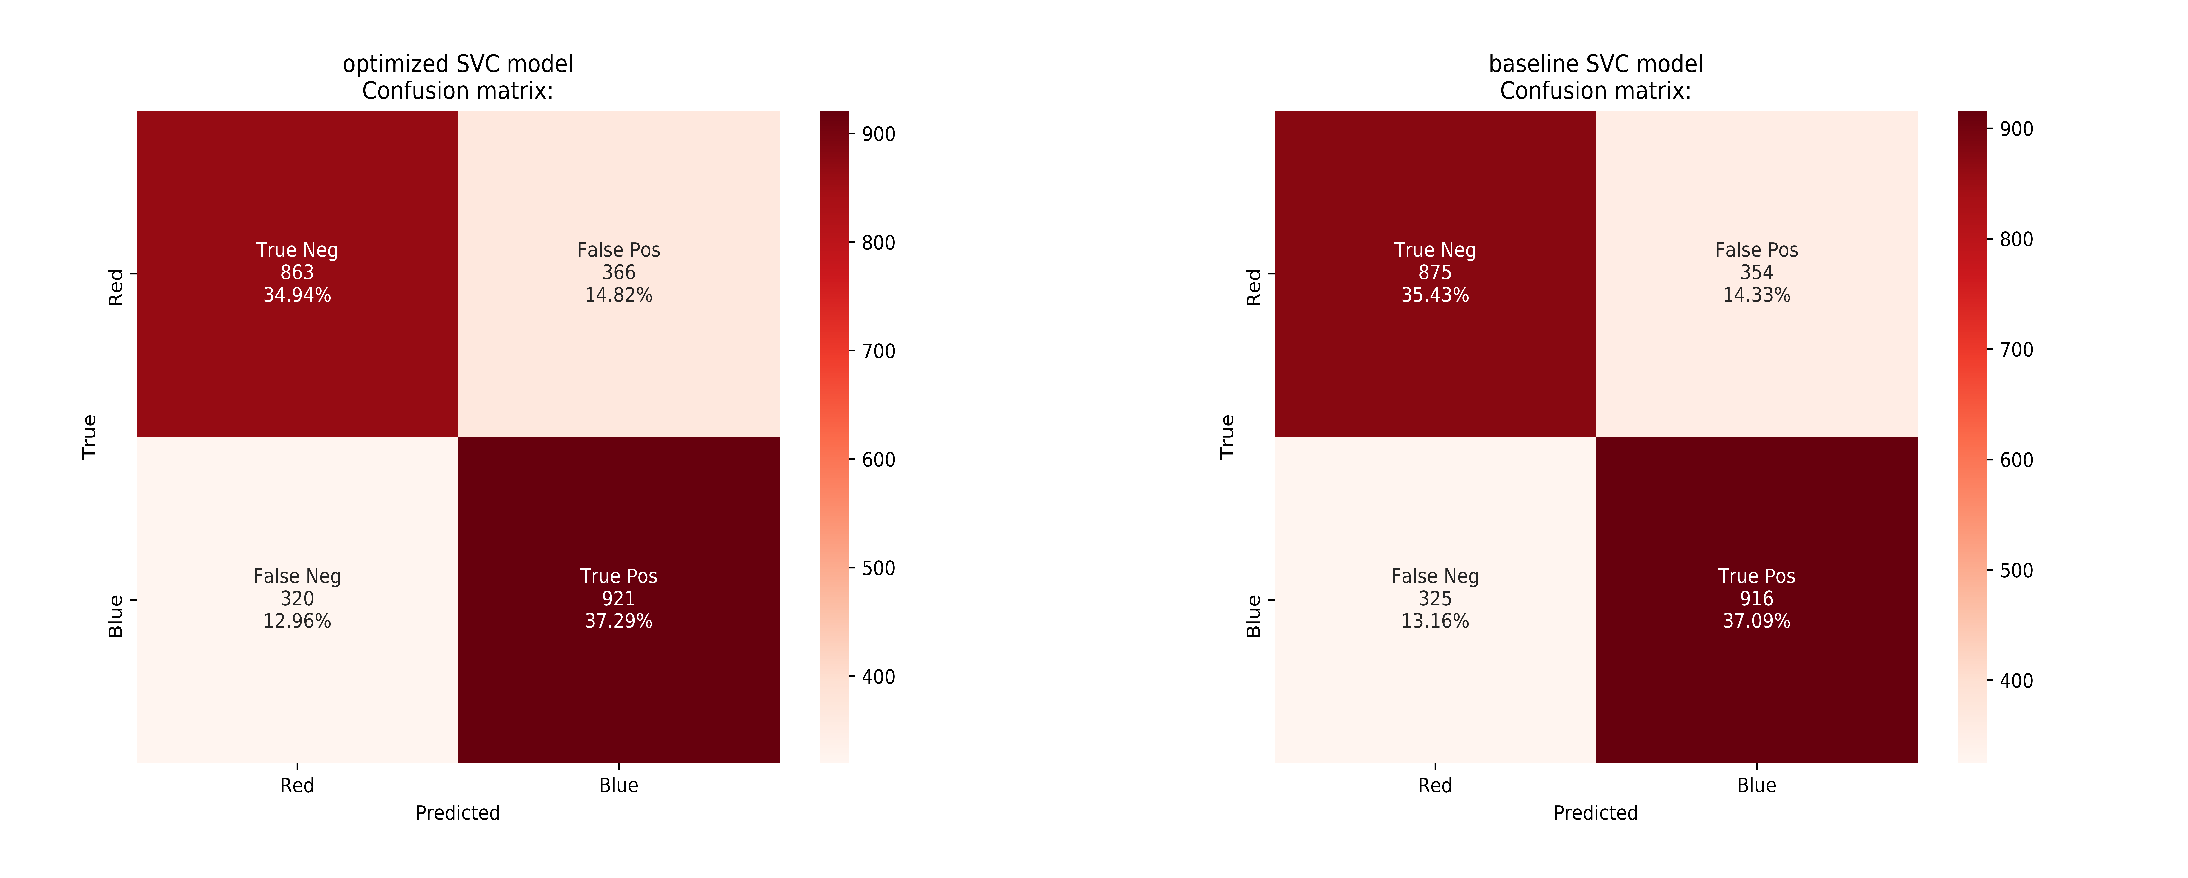

In [69]:
plt.figure(figsize=(32,12))
plt.subplot(121)
plt.imshow(plt.imread(baseLineModel_SVM['confusion matrix']),interpolation='none',      
                   extent=[-2, 4, -3, 2], clip_on=True)
plt.axis('off')
plt.subplot(122)
plt.imshow(plt.imread(SVC_model['confusion matrix']),interpolation='none',
                   extent=[-2, 4, -3, 2], clip_on=True)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


Roc curve:
<class 'sklearn.metrics._plot.roc_curve.RocCurveDisplay'>


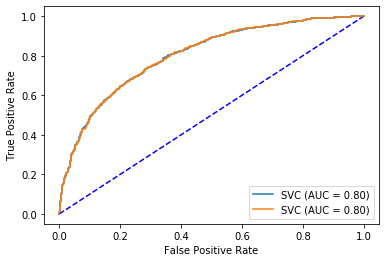

In [44]:
showRocCurve(testD,testE,pred,model,curves=[baseLineModel_SVM["roc curve"]])

we can see that the optimized model came really close to the baseline model with a accuracy score of about 71%-73%, and this is also really close to our results with the knn model

In [70]:
allModels[2] = baseLineModel_SVM
allModels[3] = SVC_model

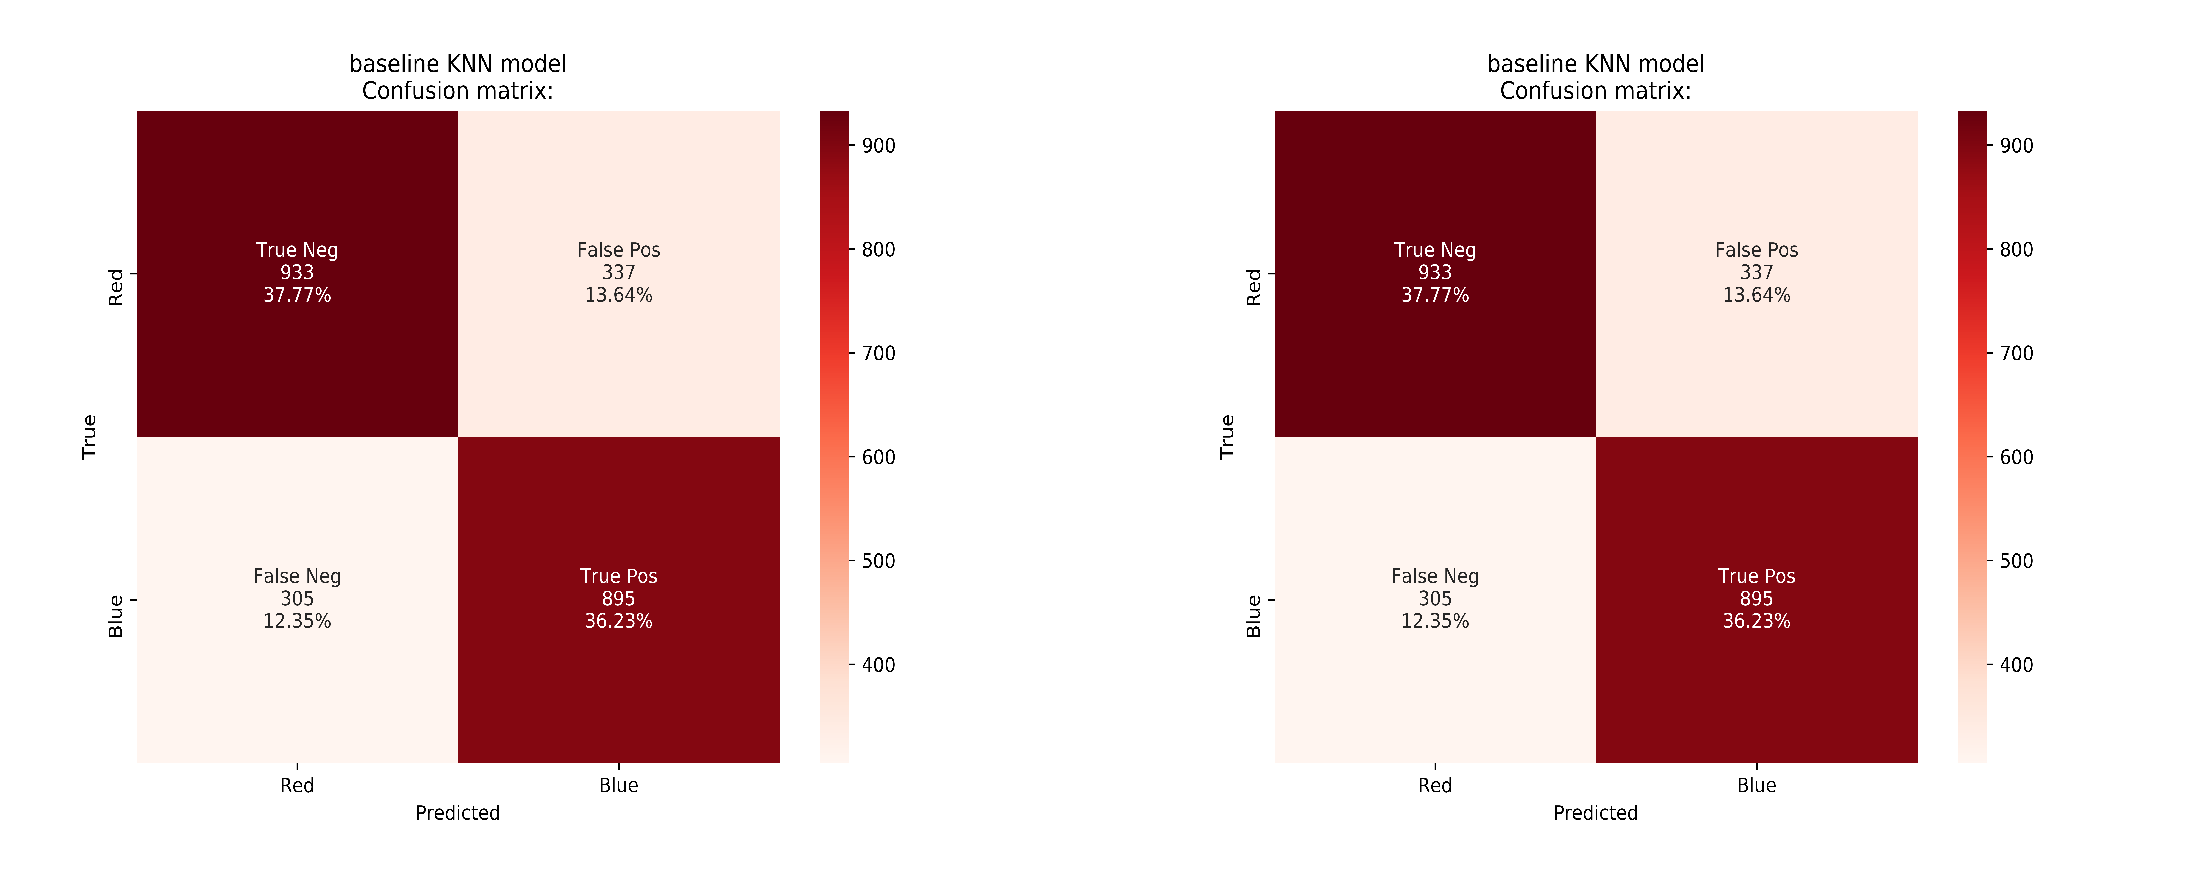

# KNN vs SVM

In [46]:
print("KNN baseline model accuracy:",allModels[0]["accuracy"],"\noptimized KNN model accuracy:",allModels[1]["accuracy"])
print("SVC baseline model accuracy:",allModels[2]["accuracy"],"\noptimized SVC model accuracy:",allModels[3]["accuracy"])

KNN baseline model accuracy: 0.68582995951417 
optimized KNN model accuracy: 0.7234817813765182
SVC baseline model accuracy: 0.7251012145748987 
optimized SVC model accuracy: 0.7222672064777328


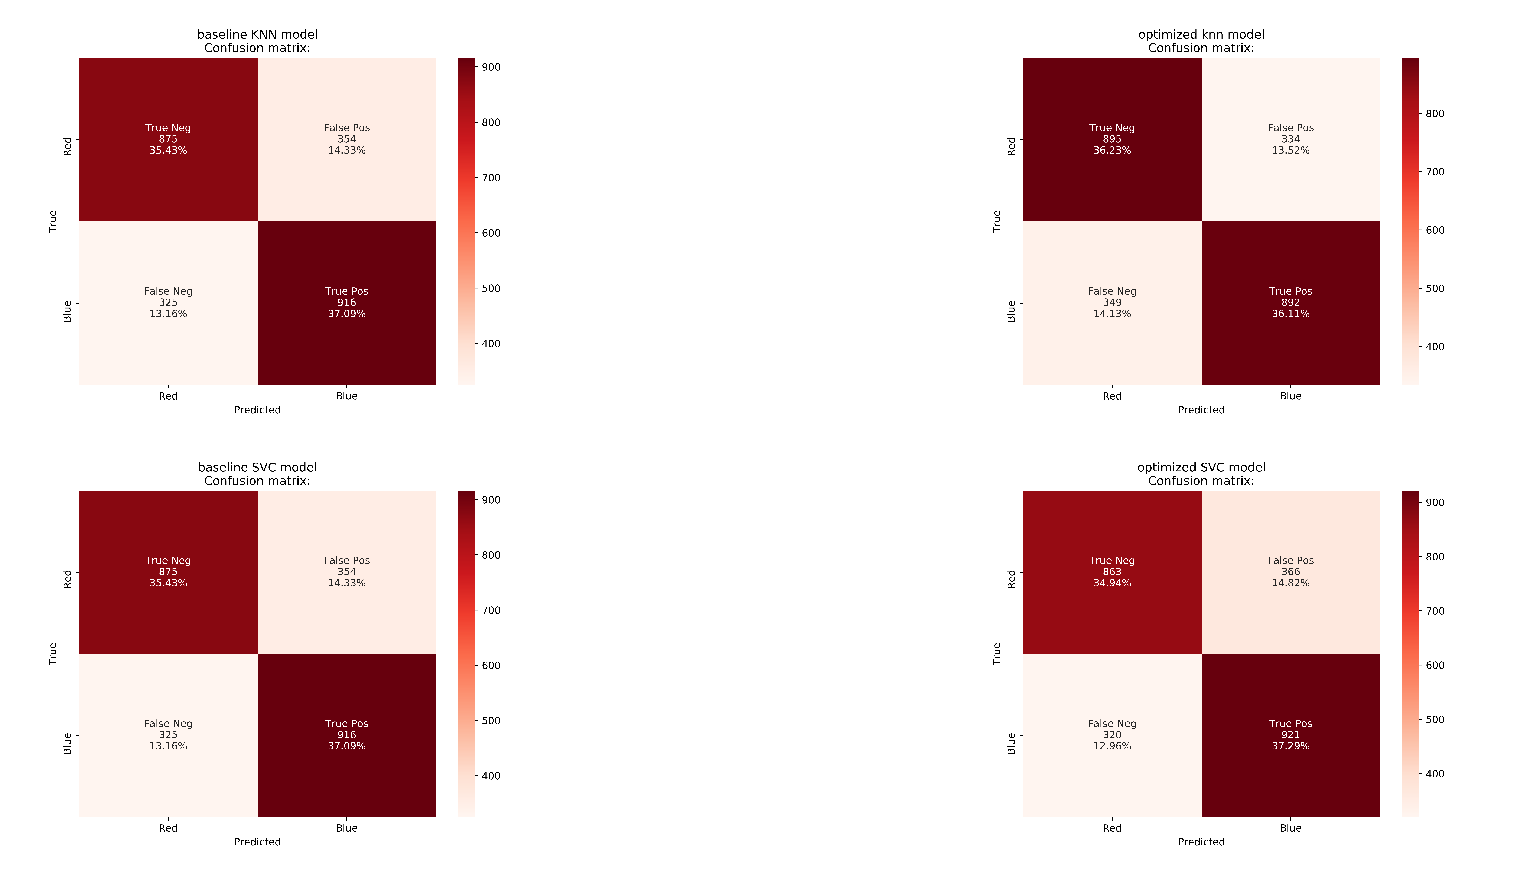

In [71]:
fig, axs = plt.subplots(2,2,figsize=(32,12))


axs[0,0].imshow(plt.imread(allModels[0]['confusion matrix']),interpolation='none',      
                    clip_on=True)
axs[0,0].axis('off')

axs[0,1].imshow(plt.imread(allModels[1]['confusion matrix']),interpolation='none',      
                    clip_on=True)
axs[0,1].axis('off')

axs[1,0].imshow(plt.imread(allModels[2]['confusion matrix']),interpolation='none',      
                    clip_on=True)
axs[1,0].axis('off')

axs[1,1].imshow(plt.imread(allModels[3]['confusion matrix']),interpolation='none',      
                    clip_on=True)
axs[1,1].axis('off')
#extent=[-2, 4, -3, 2]
plt.tight_layout(pad=0)
plt.show()

# Conclusions
70%-74% seems like a low accuracy but considering the dataset is based on the first 10 minutes of a game, having anything over 65% is incredibly good!

There is a reason why you can only surrender a game of lol after minute 15, all it takes is a good gank at bot lane and the entire game could flip upside down and by minute 15,it is really unlikely to win a game if the enemy is really ahead.

In addition, the dataset doesn't list the champions on each team, some chamions are really good at the early part of the game like Renekton and Lee sin, but tend to fall off in the mid-late game while chamions like Veigar and Nasus tend to have a hard time at the early parts of the game, but can solo carry a game if kept unchecked.

Since we only have data from the 10 minute mark, we can only get a 70%-74% accuracy score, but if we had data from minute 15 or 20, I would expect an accuracy rate closer to 80%-85%.

In [49]:
#end

In [50]:

param_grid2=[
    {'C':[0.5,0.75,1,2,4],'loss':['hinge', 'squared_hinge']}
]
gridSearch2 = GridSearchCV(linearClf,param_grid2,cv=10,scoring='accuracy',return_train_score=True,verbose=4,n_jobs=2)

In [51]:
gridSearchDF = pd.DataFrame(gridSearch.cv_results_)

gridSearchDF["std_train_score"]

0     0.001467
1     0.001506
2     0.001570
3     0.001547
4     0.001481
5     0.001285
6     0.001339
7     0.001299
8     0.001589
9     0.001299
10    0.001765
Name: std_train_score, dtype: float64

In [52]:
svcClf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [53]:
gridSearchDF.sort_values(by="rank_test_score",inplace=True)
gridSearchDF.drop(columns=["std_fit_time","mean_score_time","std_score_time","params","split4_train_score","split3_train_score","split1_train_score","split2_train_score","split0_train_score","split1_test_score","split2_test_score","split3_test_score","split4_test_score","split0_test_score"])

mean_fit_time param_C param_kernel param_coef0 param_degree  \
8        2.794248     NaN         poly           5            3   
6        2.087039     NaN         poly           1            3   
2        2.811490       1          rbf         NaN          NaN   
0        3.114199    0.75          rbf         NaN          NaN   
3        2.898469     1.1          rbf         NaN          NaN   
10       2.919366     NaN         poly           7            3   
1        2.912430     0.9          rbf         NaN          NaN   
4        2.535915    1.25          rbf         NaN          NaN   
5        2.392894     NaN         poly           1            1   
7        2.310054     NaN         poly           5            1   
9        2.596261     NaN         poly           7            1   

    split5_test_score  split6_test_score  split7_test_score  \
8            0.734143           0.721997           0.724696   
6            0.736842           0.719298           0.721997   
2            0.732794           0.720648           0.727395   
0            0.732794           0.720648           0.726046   
3            0.734143           0.720648           0.726046   
10           0.732794           0.721997           0.727395   
1            0.732794           0.720648           0.724696   
4            0.734143           0.719298           0.726046   
5            0.731444           0.721997           0.726046   
7            0.731444           0.721997           0.726046   
9            0.731444           0.721997           0.726046   

    split8_test_score  split9_test_score  mean_test_score  std_test_score  \
8            0.717949           0.737838         0.729114        0.009139   
6            0.715250           0.736486         0.729114        0.011836   
2            0.715250           0.733784         0.728979        0.010363   
0            0.715250           0.733784         0.728979        0.010150   
3            0.715250           0.733784         0.728979        0.010450   
10           0.717949           0.740541         0.728845        0.009016   
1            0.715250           0.733784         0.728844        0.010565   
4            0.715250           0.732432         0.728844        0.010518   
5            0.715250           0.735135         0.728709        0.010396   
7            0.715250           0.735135         0.728709        0.010396   
9            0.715250           0.735135         0.728709        0.010396   

    rank_test_score  split5_train_score  split6_train_score  \
8                 1            0.727504            0.730204   
6                 2            0.727504            0.729304   
2                 3            0.727355            0.731254   
0                 4            0.727654            0.729754   
3                 4            0.727355            0.730954   
10                6            0.727804            0.731404   
1                 7            0.727504            0.730954   
4                 8            0.727804            0.731404   
5                 9            0.727954            0.729004   
7                 9            0.727954            0.729004   
9                 9            0.727654            0.729004   

    split7_train_score  split8_train_score  split9_train_score  \
8             0.730204            0.731404            0.727845   
6             0.729454            0.730354            0.726496   
2             0.730204            0.730954            0.728745   
0             0.729604            0.731104            0.727995   
3             0.730354            0.730804            0.728895   
10            0.730054            0.730954            0.728295   
1             0.729904            0.731104            0.728445   
4             0.730204            0.730654            0.728745   
5             0.728854            0.730654            0.727395   
7             0.728854            0.730804            0.727395   
9             0.728854            